# Testing ESS Modelling Toolkit (EMTK) 

## Lorentzian Curve / Cauchy Distribution

Generated 2000 samples using parameters [0.01111111]
Lorentzian curve maximum likelihood estimation
2000 data points
[0.0001] as initial guess (kappa)
[0.01112818]  +/- [0.00021915]? solution obtained numerically
[0.01112818] solution obtained numerically
That a maximum was found is True via second derivative


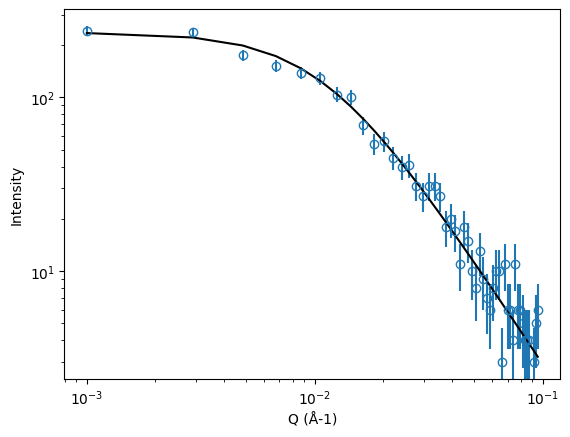

In [1]:
import emtk
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload

reload(emtk)

clength = 90.0 # correlation length in system

kappa = 1.0 / clength
curv = emtk.lorentzianCurve()
pvalues = np.array([kappa])
xrange = np.array([0.001, 0.1])
curv.generateTestSamples(pvalues, xrange, 2000)
#curv.generatebackground(xrange, ratio=0.1) # method is resistant to a 10% background, which is pretty big
curv.mle()
#curv.report()
#curv.mleAnalytic()
curv.report()
curv.plotFit(logarithmic=True)
#a2 = curv.adtest()
#print("Anderson Darling test statistic:", a2)
#ks = curv.kstest()
#print("Kolmogorov Smirnov test statistic:", ks)


In [2]:
reload(emtk)
curv = emtk.lorentzianCurve()
pars =  np.array([1.0/90.0])
qt = curv.Quantile(pars, 0.6)
nqt= curv.nQuantile(pars, 0.6)
print("qt :", qt)
print("nqt:", nqt)



qt : 0.0036102188470322916
nqt: [0.00361022]


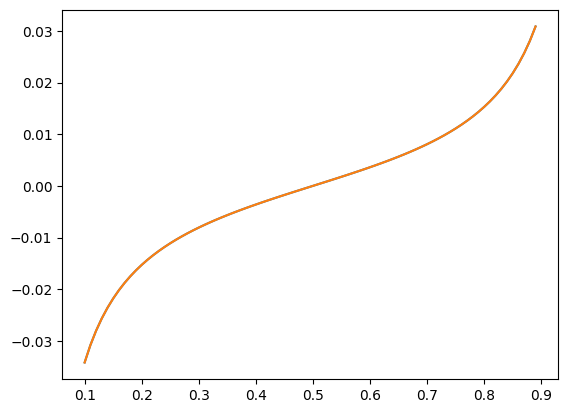

In [3]:
xs = np.arange(0.1, 0.9, 0.01)
ys = curv.Quantile(pars, xs)
nys= curv.nQuantile(pars, xs)
fx,ax = plt.subplots()
ax.plot(xs, ys)
ax.plot(xs, nys)

In [14]:
curv.Quantile(pars, 0.8)

0.015293132449679708

In [15]:
curv.nQuantile(pars, 0.8)

array([0.01529313])

In [5]:
curv.cdf(pars, curv.Quantile(pars, 0.4))

0.4

In [6]:
curv.cdf(pars, curv.nQuantile(pars, 0.4))

array([0.4])

Generated 5000 samples using parameters [0.01111111]
Adding flat background of 500.0 points
[0.01230616] [[0.00027626]]
[0.0123004] [0.00022405]


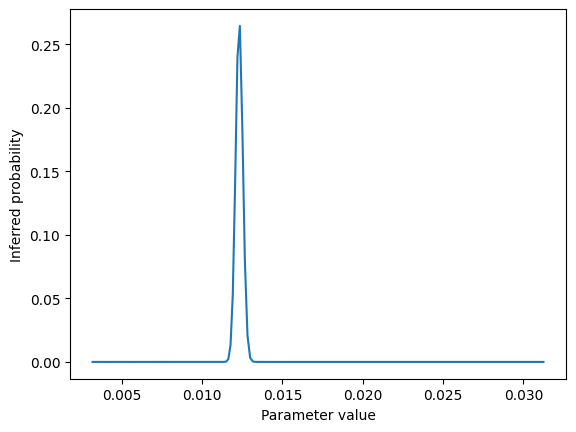

In [95]:
# Bayesian Inference

import emtk
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload

reload(emtk)

clength = 90.0 # correlation length in system

kappa = 1.0 / clength
curvMLE = emtk.lorentzianCurve()
curvBayes=emtk.lorentzianCurve()
pvalues = np.array([kappa])
xrange = np.array([0.001, 0.1])
curvMLE.generateTestSamples(pvalues, xrange, 5000)
curvMLE.generatebackground(xrange, ratio=0.1)
curvBayes.data = curvMLE.data
curvBayes.infer(plot=True)
curvMLE.mle()
print(curvMLE.estimates, curvMLE.variances)
print(curvBayes.estimates, curvBayes.variances)

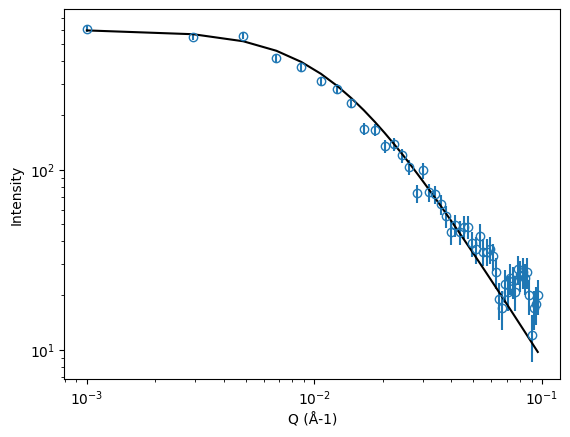

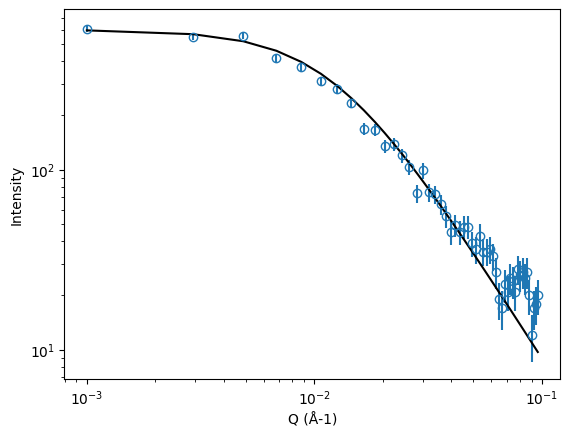

In [96]:
curvMLE.plotFit(logarithmic=True)
curvBayes.plotFit(logarithmic=True)

# Lorentzian-Squared (Not ready yet)

Generated 2000 samples using parameters [0.01111111 0.1       ]


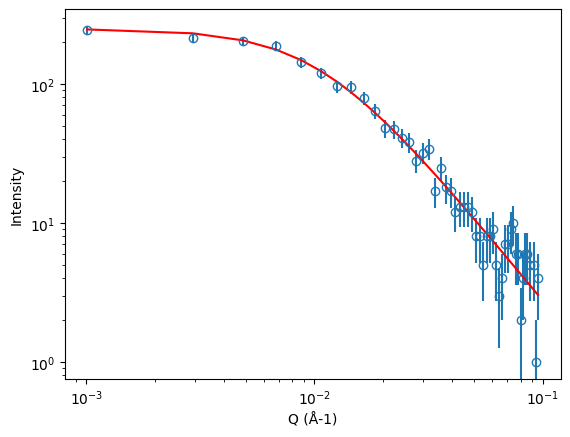

In [2]:
# At present, this is NOT working correctly and needs more development
# It is not clear why this curve shape does not work.
# Suspicion: that the Aharony-Pytte function needs to be replaced
# with an alternative disordered system model.

reload(emtk)
curv = emtk.lorentzianSquaredCurve()
kappa = 1.0 / 90.0
ss = 0.1
pvalues = np.array([kappa, ss])
xrange = np.array([0.001, 0.1])
curv.generateTestSamples(pvalues, xrange, 2000)
curv.guesses = pvalues
#curv.mle()
#curv.report()
curv.plotFit(logarithmic=True)

Lorentzian Squared maximum likelihood estimation
2000 data points
[0.01111111 0.1       ] as initial guesses (kappa, S)
[2.69790466e-02 1.05941417e+05] solution obtained numerically
R = 37.06580200009233
That a maximum was found is True via second derivative


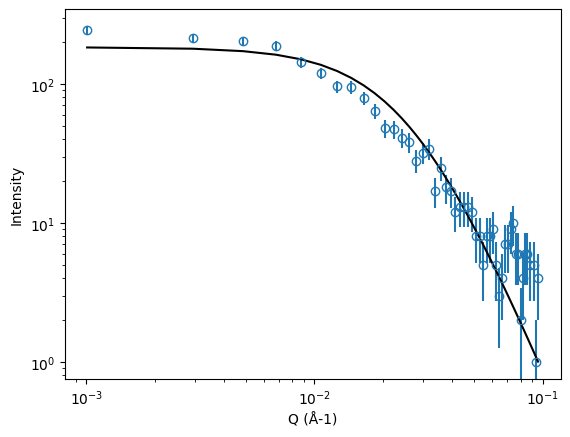

In [4]:
curv.mle()
curv.report()
curv.plotFit()

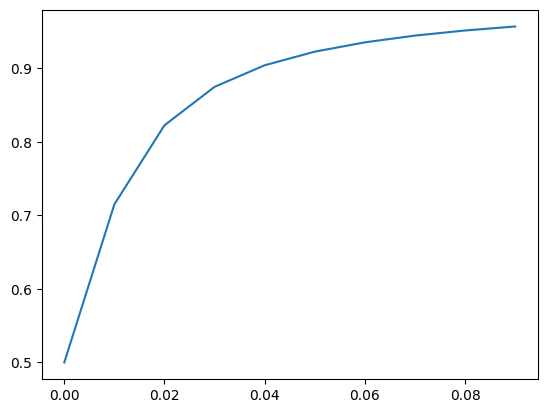

In [3]:
pars =  np.array([1.0/80.0, 0.1])
xs = np.arange(0.0, 0.1, 0.01)
ys = curv.cdf(pars, xs)
fx,ax = plt.subplots()
ax.plot(xs, ys)

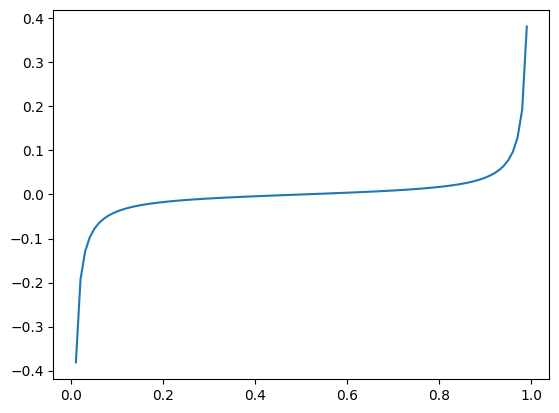

In [5]:
pars =  np.array([1.0/80.0, 0.1])
xs = np.arange(0.01, 1.0, 0.01)
ys = curv.Quantile(pars, xs)
fx,ax = plt.subplots()
ax.plot(xs, ys)

## Hard Spheres

Generated 4000 samples using parameters [75.]
Hard sphere model maximum likelihood estimation
4000 data points
[80.] as initial guesses (R, Angstroms)
[74.84127714] solution obtained numerically
The second derivative indicates that this is a maximum


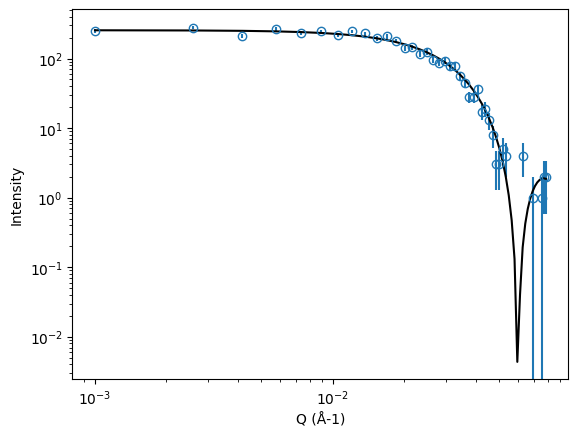

In [6]:
reload(emtk)
curv = emtk.hardSphereCurve()
pvalues = np.array([75.0])
xrange = np.array([0.001, 0.1])
curv.generateTestSamples(pvalues, xrange, 4000)
curv.guesses = np.array([80.0])
curv.mle()
curv.report()
curv.plotFit(logarithmic=True)

Adding flat background of 400.0 points
Hard sphere model maximum likelihood estimation
4400 data points
[80.] as initial guesses (R, Angstroms)
[80.03241] solution obtained numerically
The second derivative indicates that this is not a maximum


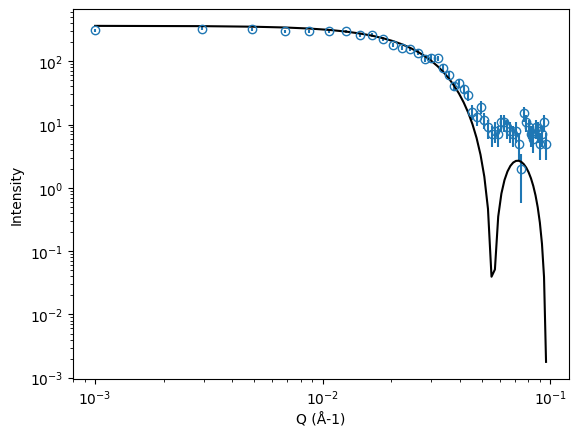

In [7]:
# It is quite tolerant of backgrounds here as well
curv.generatebackground(xrange, ratio=0.1)
curv.mle()
curv.report()
curv.plotFit(logarithmic=True)

# Porod Scattering

Generated 6000 samples using parameters [4.e+00 1.e-03]
Calculating best minimal value for power law fit
Generalised Porod curve maximum likelihood estimation
6000 data points
[3.6   0.005] as initial guesses (z, qmin)
[4.04323553e+00 1.19224147e-03] solution obtained analytically


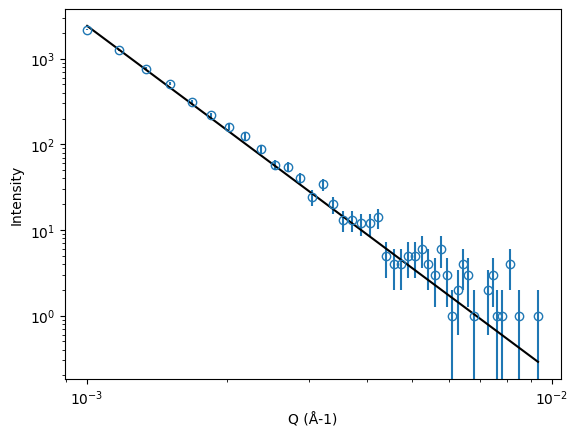

In [9]:
reload(emtk)
curv = emtk.porodCurve()
pvalues = np.array([4.0, 0.001])
xrange = np.array([0.001, 0.01])
curv.generateTestSamples(pvalues, xrange, 6000)
curv.guesses = np.array([3.6, 0.005])
curv.mle()
curv.report()
curv.plotFit(logarithmic=True)

Adding flat background of 6.0 points
Calculating best minimal value for power law fit
Generalised Porod curve maximum likelihood estimation
6006 data points
[3.6   0.005] as initial guesses (z, qmin)
[4.00962817e+00 1.13120372e-03] solution obtained analytically


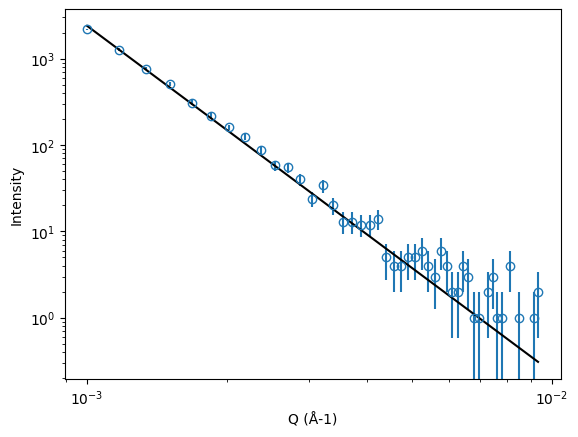

In [10]:
curv.generatebackground(xrange, ratio=1.0E-03)
curv.mle()
curv.report()
curv.plotFit(logarithmic=True)

# Real Data

## Work in progress... 

1. Get mantid working, and grab the routines that convert TOF and angle into Q.  This has been done on all major instruments and there is no point in reinventing the wheel.

Future tasks / problems:

2. SANS correction of sample can, background, and transmission - how to do for each Q point without histogramming.  The solution I'm sure is **kernel density estimation** which we discussed earlier in the project.
3. Interface: I need to figure out how to import and call mantid routines in any version of python without running mantid.  It is possible.  Or:
4. Turn this mle code into a mantid plugin?

## But...

It's not clear that this can be done without temporary histogramming, especially the background subtraction.  The more I think about this problem, the more it seems that "behind the scenes" a histogram needs to be dynamically established in order to decide how many events to discard proportional to the systematic background ("can SANS"). 

# Missing Features List

The following might be interesting
* pytest? --- done
* distribution & statistical testing? 
* sphinx? - like doxygen.  Read about it and rejected it

# open data catalogues
data.ill.eu - similar catalogue at ISIS
data.panasc.eu

QUENS data is almost always lorenzian 

Also check this:
https://github.com/DAaaS-reference-data
This last one might be the most useful, it looks like a clean lorentzian curve and there is also a reflectivity curve there.

# Desired outcome

Event mode
Fit to some distribution
Plot of estimated parameter vs events used, with error bar, compared to the traditional way of doing it.
Should ask Wojciech to do an analysis with which we compared

# Links
https://confluence.esss.lu.se/display/DCC/Owncloud 
http://project.esss.dk/owncloud/index.php/f/16885248 
https://docs.google.com/document/d/1dOnBtLCSYZ__7IK479Qb8eYivxP-nBejNLA-WrmV_UA/edit
marketplace.sasview.org

https://content.iospress.com/articles/journal-of-neutron-research/jnr220002
